In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [2]:
!python --version

Python 3.6.10 :: Anaconda, Inc.


In [3]:
import cmdbench

In [4]:
import psutil

In [5]:
psutil.__version__

'5.7.0'

In [6]:
results = cmdbench.benchmark_command("node --expose-gc test.js")

In [7]:
results

{'cpu': {'total_time': 22.71,
  'percentages': array([  0. ,   0. , 159.4, ...,   0. ,   0. ,   0. ]),
  'percentages_stats': Stats(mean=25.39531772575251, std=60.77207441122552)},
 'memory': {'max': 4425936896,
  'values': array([ 25358336,  28008448,  29085696, ..., 157028352,  78483456,
          58281984]),
  'values_stats': Stats(mean=761338496.4280937, std=1005959701.7546811)},
 'disk': {'io_counters': pio(read_count=261, write_count=128, read_bytes=0, write_bytes=9437184, read_chars=9523720, write_chars=9438298)},
 'process': {'stdout_data': 'Running master process\n\nRunning child process #3\n\nRunning child process #4\n\nRunning child process #5\n\nRunning child process #2\n\nRunning child process #1\n\nRunning child process #8\n\nRunning child process #6\n\nRunning child process #7\n',
  'stderr_data': '',
  'execution_time': 8518},
 'gnu_time_results': {'Command being timed': '"node --expose-gc test.js"',
  'User time (seconds)': '21.22',
  'System time (seconds)': '1.50',
 

In [8]:
results["gnu_time_results"]["Maximum resident set size (kbytes)"]

'614248'

In [9]:
process_stdout_data = results["process"]["stdout_data"]
process_stderr_data = results["process"]["stderr_data"]
print("STDOUT: \n\n%s" % process_stdout_data)
print("STDERR: \n\n%s" % process_stderr_data)

STDOUT: 

Running master process

Running child process #3

Running child process #4

Running child process #5

Running child process #2

Running child process #1

Running child process #8

Running child process #6

Running child process #7

STDERR: 




In [10]:
results_cpu_percentages = results["cpu"]["percentages"]
results_memory_values = results["memory"]["values"]

In [11]:
execution_time_ms = results["process"]["execution_time"]
# Should be equal
cpu_samples_per_ms = len(results_cpu_percentages) / execution_time_ms
memory_samples_per_ms = len(results_memory_values) / execution_time_ms

print("Execution time (ms): %s" % execution_time_ms)
print("Cpu samples per second: %s" % (cpu_samples_per_ms*1000))
print("Memory samples per second: %s" % (memory_samples_per_ms*1000))

Execution time (ms): 8518
Cpu samples per second: 140.4085466071848
Memory samples per second: 140.4085466071848


In [12]:
## DISK USAGE
# https://psutil.readthedocs.io/en/latest/#psutil.Process.io_counters
disk_io_counters_read = results["disk"]["io_counters"].read_chars
disk_io_counters_write = results["disk"]["io_counters"].write_chars
disk_io_counters_total = disk_io_counters_read + disk_io_counters_write

print(results["disk"]["io_counters"])
print("Total disk I/O (bytes): %s" %  disk_io_counters_total)
print("Total disk read (bytes): %s" %  disk_io_counters_read)
print("Total disk write (bytes): %s" %  disk_io_counters_write)

pio(read_count=261, write_count=128, read_bytes=0, write_bytes=9437184, read_chars=9523720, write_chars=9438298)
Total disk I/O (bytes): 18962018
Total disk read (bytes): 9523720
Total disk write (bytes): 9438298


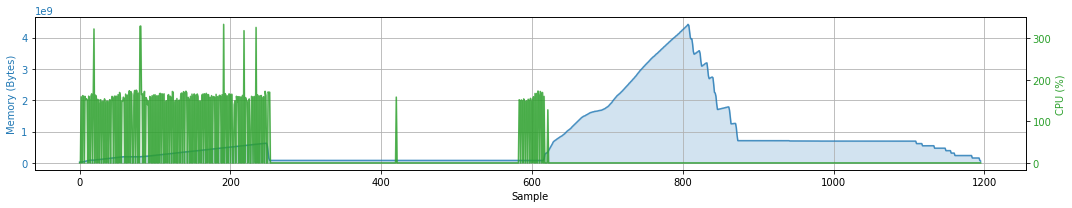

Total CPU time (seconds): 22.71
Max used memory (bytes): 4425936896


In [13]:
## CPU + MEMORY

plt.rcParams["figure.figsize"] = (15,3)

# Data for plotting
x = np.arange(0, len(results_memory_values), 1)
memory_y = results_memory_values
cpu_y = results_cpu_percentages


color = 'tab:blue'
fig, ax_memory = plt.subplots()
ax_memory.grid()
ax_memory.set_xlabel('Sample')
ax_memory.set_ylabel('Memory (Bytes)', color=color)
ax_memory.plot(x, memory_y, color=color, alpha=0.8)
ax_memory.tick_params(axis='y', labelcolor=color)
plt.fill_between(x, memory_y, alpha=0.2, color=color)

color = 'tab:green'
ax_cpu = ax_memory.twinx()
ax_cpu.set_ylabel('CPU (%)', color=color)
ax_cpu.plot(x, cpu_y, color=color, alpha=0.8)
ax_cpu.tick_params(axis='y', labelcolor=color)
plt.fill_between(x, cpu_y, alpha=0.2, color=color)


plt.tight_layout()

# Delete figure file if it already exists and save the new one
figure_image_save_path = "resources/benchmark.png"
if os.path.exists(figure_image_save_path):
    os.remove(figure_image_save_path)
fig.savefig(figure_image_save_path)

plt.show()

print("Total CPU time (seconds): %s" % results["cpu"]["total_time"])
print("Max used memory (bytes): %s" % results["memory"]["max"])